[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=lab/tree/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)

#### based on Jaruga and Pawlowska (Geosci. Model Dev. 11)  "_libcloudph++ 2.0: aqueous-phase chemistry extension of the particle-based cloud microphysics scheme_"   
https://doi.org/10.5194/gmd-11-3623-2018

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install git+https://github.com/atmos-cloud-sim-uj/PySDM-examples.git
    !ldconfig

In [2]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics import si
import numpy as np
import os
from matplotlib import pyplot

/home/slayoo/devel/PySDM/PySDM/backends/__init__.py:29: UserWarning: CUDA library found but cuInit() failed (error code: 999; message: unknown error)
  warnings.warn(


In [3]:
n_points = 6 if 'CI' not in os.environ else 2
nsd = np.logspace(0, n_points-1, num=n_points, base=2.0, dtype=int)

In [9]:
simulations = []
for it in range(len(nsd)):
    settings = Settings(dt=1*si.s, n_sd=nsd[it], n_substep=10 if 'CI' not in os.environ else 2)
    settings.output_interval = 25 * si.s
    
    simulation = Simulation(settings)
    output = simulation.run()
    simulations.append({'settings': settings, 'output': output})

In [10]:
smax = []
droplet_number = []
for simulation in simulations:
    smax.append(np.nanmax(simulation['output']["S_max"]))
    droplet_number.append(np.nanmax(simulation['output']["n_c_cm3"]))

[0.32628843269142394, 0.2832711899149132, 0.27842850889459037]


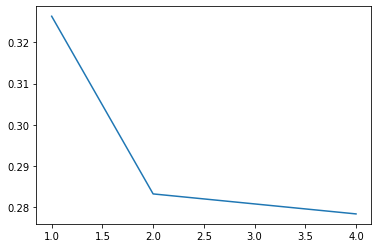

In [11]:
print(smax)
pyplot.plot(nsd, smax)
pyplot.show()

[641.1723941307044, 321.0085333859088, 320.58969240801156]


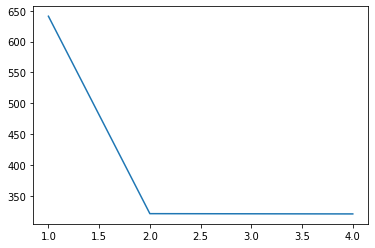

In [12]:
print(droplet_number)
pyplot.plot(nsd, droplet_number)
pyplot.show()

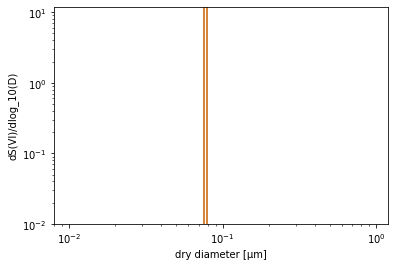

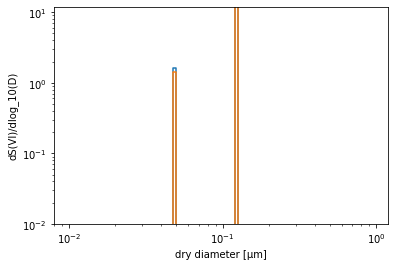

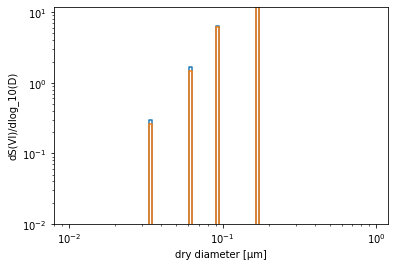

In [13]:
for simulation in simulations:
    for step in (0, -1):
        pyplot.step(
            2e6 * simulation['settings'].dry_radius_bins_edges[:-1],
            simulation['output']['dm_S_VI/dlog_10(dry diameter)'][step]
        )
    pyplot.ylabel('dS(VI)/dlog_10(D)')
    pyplot.xlabel('dry diameter [µm]')
    pyplot.xscale('log')
    pyplot.yscale('log')
    pyplot.ylim([.01,12])
    pyplot.show()